In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# text processing with sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()


,blurb,country,goal,name,state,main_category,sub_category,location_type,duration,deadline_month,deadline_day,launched_at_month,launched_at_day
0,A colorful Dia de los Muertos themed oracle de...,US,1000.0,The Ofrenda Oracle Deck,successful,games,playing cards,Town,30,9,9,8,10
1,"Electra's long awaited, eclectic Debut Pop/Roc...",US,15000.0,"Record Electra's Debut Album (Pop, Rock, Class...",successful,music,rock,Suburb,30,6,12,5,13
2,The Mist of Tribunal is a turn-based card game...,GB,10000.0,The Mist of Tribunal - A Card Game,failed,games,playing cards,Town,59,3,13,1,12
3,"Livng with a brain impairment, what its like t...",US,2800.0,Help change the face of Brain Impairment,successful,publishing,nonfiction,Town,30,1,9,12,10
4,Annapolis Chamber Players is a non-for profit ...,US,3500.0,Annapolis Chamber Music Project,successful,music,classical music,Town,30,5,2,4,2


In [5]:
df['target'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0).astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177522 entries, 0 to 177521
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   blurb              177514 non-null  object 
 1   country            177522 non-null  object 
 2   goal               177522 non-null  float64
 3   name               177522 non-null  object 
 4   state              177522 non-null  object 
 5   main_category      177522 non-null  object 
 6   sub_category       177522 non-null  object 
 7   location_type      177522 non-null  object 
 8   duration           177522 non-null  int64  
 9   deadline_month     177522 non-null  int64  
 10  deadline_day       177522 non-null  int64  
 11  launched_at_month  177522 non-null  int64  
 12  launched_at_day    177522 non-null  int64  
 13  target             177522 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 19.0+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,177522.0,52837.943569,1.252412e+06,0.01,1500.0,5000.0,15000.0,100000000.0
duration,177522.0,32.593250,1.183635e+01,1.00,29.0,30.0,34.0,93.0
deadline_month,177522.0,6.715759,3.362235e+00,1.00,4.0,7.0,10.0,12.0
deadline_day,177522.0,15.301884,9.068377e+00,1.00,7.0,15.0,23.0,31.0
launched_at_month,177522.0,6.424967,3.349665e+00,1.00,4.0,6.0,9.0,12.0
launched_at_day,177522.0,15.237385,8.855568e+00,1.00,8.0,15.0,23.0,31.0
target,177522.0,0.531759,4.989917e-01,0.00,0.0,1.0,1.0,1.0


<Axes: xlabel='state', ylabel='Count'>

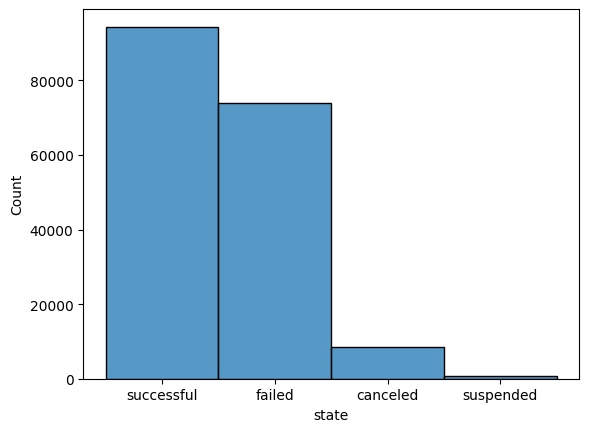

In [8]:
sns.histplot(data=df,x='state')

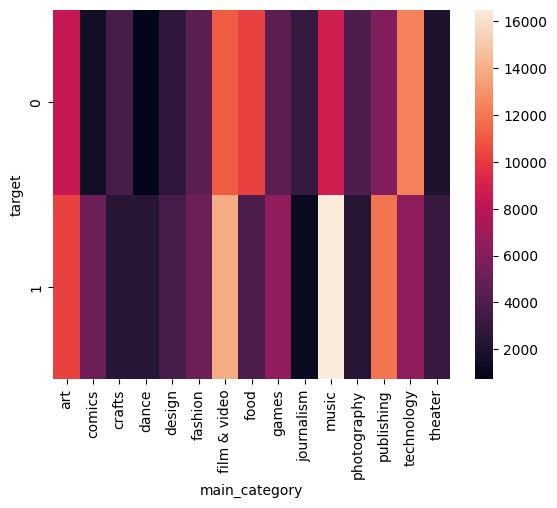

In [9]:
pt=df.pivot_table(index='target',columns='main_category',aggfunc='size',fill_value=0)
sns.heatmap(pt)
plt.show()

In [10]:
pd.crosstab(df['main_category'],df['state']).sort_values(by='successful',ascending=False)

state,canceled,failed,successful,suspended
main_category,,,,
music,835,7967,16493,44
film & video,1225,9858,13937,33
publishing,747,5035,11875,29
art,763,7614,10316,32
games,295,4157,6500,71
technology,885,11332,6402,106
fashion,622,3783,5065,52
comics,200,1299,5057,7
food,813,9377,3887,66


In [11]:
pd.crosstab(df['sub_category'],df['state']).sort_values(by='successful',ascending=False)

state,canceled,failed,successful,suspended
sub_category,,,,
indie rock,0,0,2381,0
rock,0,0,2378,0
country & folk,0,0,2374,0
nonfiction,0,0,2350,0
fiction,0,0,2333,0
...,...,...,...,...
letterpress,1,23,33,1
chiptune,2,8,30,0
embroidery,13,94,26,0


In [12]:
pd.crosstab(df['country'],df['state'],normalize='index').sort_values(by='successful',ascending=False)

state,canceled,failed,successful,suspended
country,,,,
HK,0.042796,0.279601,0.656205,0.021398
JP,0.008811,0.378855,0.612335,0.000000
LU,0.022727,0.409091,0.568182,0.000000
GB,0.048119,0.385378,0.563253,0.003251
US,0.045749,0.401024,0.550164,0.003063
SG,0.048485,0.414141,0.533333,0.004040
DK,0.049598,0.441019,0.509383,0.000000
NZ,0.037132,0.457106,0.496799,0.008963
CA,0.060155,0.450240,0.485423,0.004183


In [13]:
df['goal'].describe()
df.groupby('state')['goal'].median().round()

state
canceled      8000.0
failed        7500.0
successful    3500.0
suspended     3500.0
Name: goal, dtype: float64

In [14]:
df.groupby('state')['goal'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
canceled,8581.0,125235.344552,2.179887e+06,1.00,2500.0,8000.0,25000.0,100000000.0
failed,73923.0,93892.731620,1.729780e+06,1.00,2500.0,7500.0,25000.0,100000000.0
successful,94399.0,12913.725528,2.488390e+05,0.01,1000.0,3500.0,10000.0,68000000.0
suspended,619.0,234859.048465,4.083680e+06,1.00,575.0,3500.0,10000.0,100000000.0


In [15]:
df['duration'].describe().T

count    177522.000000
mean         32.593250
std          11.836352
min           1.000000
25%          29.000000
50%          30.000000
75%          34.000000
max          93.000000
Name: duration, dtype: float64

In [16]:
df.groupby('state')['duration'].mean()

state
canceled      35.285515
failed        34.489388
successful    30.849183
suspended     34.802908
Name: duration, dtype: float64

In [17]:
df_1000 = df[df['goal']<1000]
df_1000.groupby('state')['goal'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
canceled,980.0,402.768367,255.254081,1.00,200.0,450.0,550.0,999.0
failed,8005.0,438.174516,237.145379,1.00,250.0,500.0,600.0,999.0
successful,19203.0,418.717382,244.650567,0.01,200.0,450.0,600.0,999.0
suspended,184.0,281.581522,268.261564,1.00,50.0,200.0,500.0,999.0


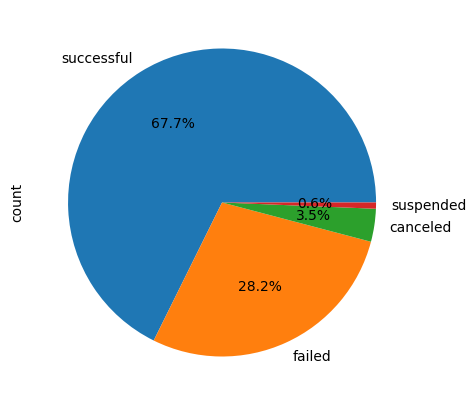

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
df_1000['state'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax)
plt.show()

/var/folders/v3/bt592v616rb9p9tryppm5ppw0000gn/T/ipykernel_10766/1843230372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000.loc[:,'goal_bin'] = pd.cut(df_1000['goal'],bins=10,labels=labels)


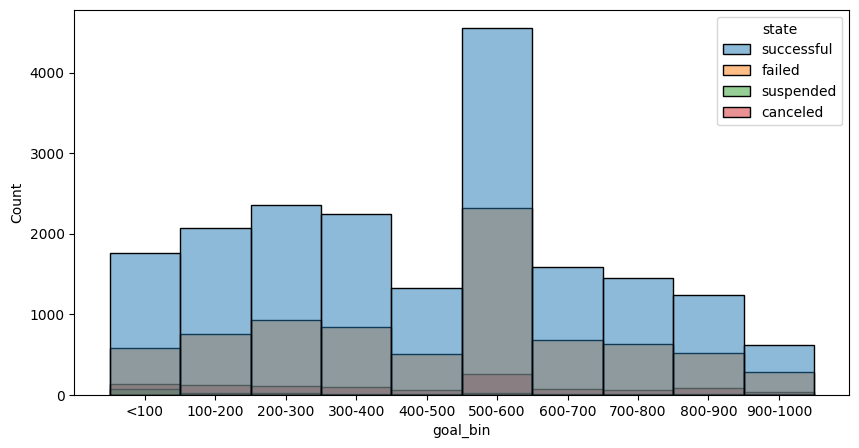

In [19]:
labels = ['<100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000']
df_1000.loc[:,'goal_bin'] = pd.cut(df_1000['goal'],bins=10,labels=labels)
# plot
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df_1000,x='goal_bin',hue='state',ax=ax)
plt.show()

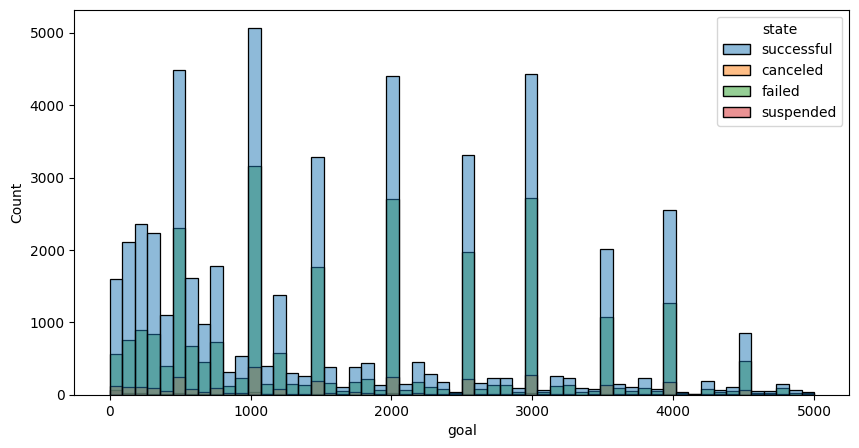

In [20]:
df_5000 = df[df['goal']<5000]
# plot
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df_5000,x='goal',hue='state',ax=ax)
plt.show()

<Axes: xlabel='goal', ylabel='Count'>

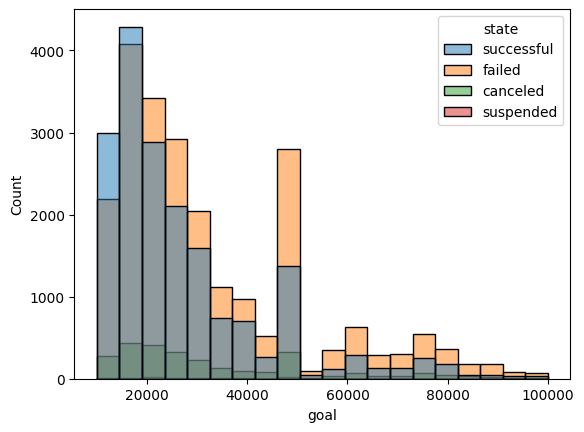

In [21]:
# subset by goal more than 10000 and less than 100000
df_10_100 = df[(df['goal'] > 10000) & (df['goal'] < 100000)]

sns.histplot(data=df_10_100,x='goal',hue='state',bins=20)

<Axes: xlabel='goal_log', ylabel='Count'>

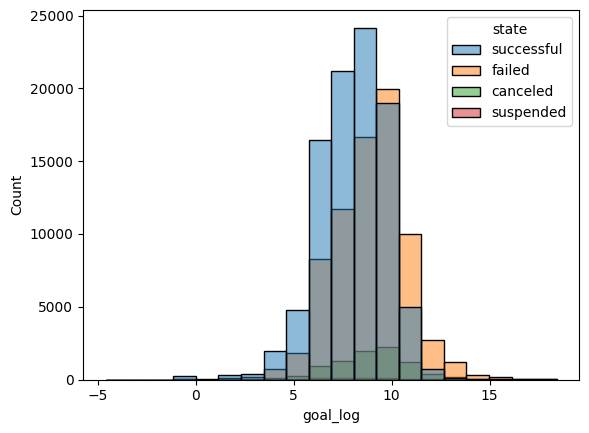

In [27]:
# remap goal to log scale
df['goal_log'] = np.log(df['goal'])

sns.histplot(data=df,x='goal_log',hue='state',bins=20)

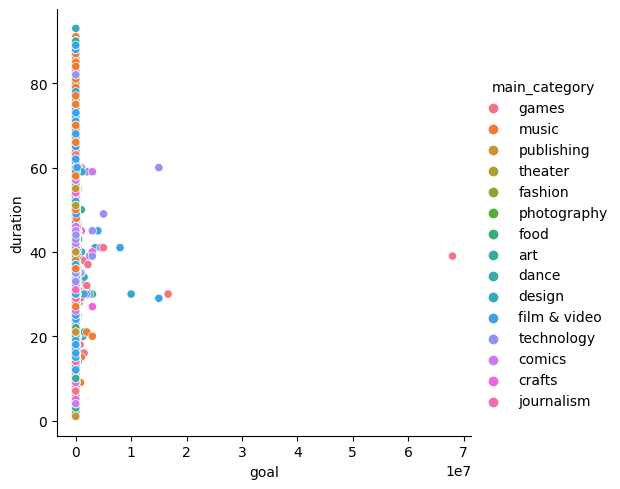

In [114]:
# relplot for goal and duration for successful
sns.relplot(data=df[df['state']=='successful'],x='goal',y='duration')

In [100]:
df['baseline']=df['goal'].apply(lambda x:1 if x<10000 else 0)
pd.crosstab(df['baseline'],df['target'])

target,0,1
baseline,,
0,38672,24917
1,44451,69482


In [101]:
df.to_csv('data_clean.csv',index=False)

In [102]:
corpus = df['name']
model = CountVectorizer(ngram_range = (2, 7), max_features = 100, stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")
matrix = model.fit_transform(corpus).toarray()
df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names_out())
df_output.T.head(10)

df_output.sum().sort_values(ascending=False).head(10)

short film       2070
debut album      1400
enamel pins      1272
playing cards    1270
new album        1268
music video       870
feature film      820
enamel pin        731
food truck        613
graphic novel     599
dtype: int64

In [103]:
# text processing with sklearn tfidf
corpus = df['name']
model = TfidfVectorizer(ngram_range = (2, 7), max_features = 100, stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")
matrix = model.fit_transform(corpus).toarray()
df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names_out())
df_output.head(10)

,album project,album release,animated series,animated short,animated short film,art book,art prints,art project,artist residency,board game,...,solo album,star wars,stop motion,studio album,tv series,video game,virtual reality,visual novel,web series,working title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# merge the dataframes
df = pd.concat([df, df_output], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177522 entries, 0 to 177521
Columns: 115 entries, blurb to working title
dtypes: float64(101), int64(7), object(7)
memory usage: 155.8+ MB


In [105]:
df.head()

,blurb,country,goal,name,state,main_category,sub_category,location_type,duration,deadline_month,...,solo album,star wars,stop motion,studio album,tv series,video game,virtual reality,visual novel,web series,working title
0,A colorful Dia de los Muertos themed oracle de...,US,1000.0,The Ofrenda Oracle Deck,successful,games,playing cards,Town,30,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Electra's long awaited, eclectic Debut Pop/Roc...",US,15000.0,"Record Electra's Debut Album (Pop, Rock, Class...",successful,music,rock,Suburb,30,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Mist of Tribunal is a turn-based card game...,GB,10000.0,The Mist of Tribunal - A Card Game,failed,games,playing cards,Town,59,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Livng with a brain impairment, what its like t...",US,2800.0,Help change the face of Brain Impairment,successful,publishing,nonfiction,Town,30,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Annapolis Chamber Players is a non-for profit ...,US,3500.0,Annapolis Chamber Music Project,successful,music,classical music,Town,30,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 6430414 words in the combination of all review.


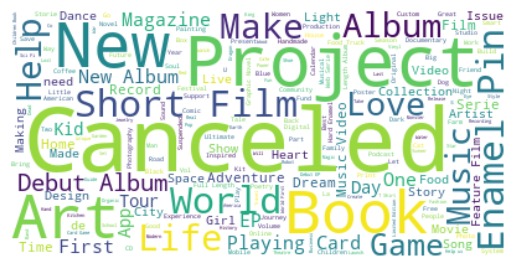

In [106]:
# plot wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in df.name)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 3540789 words in the combination of all review.


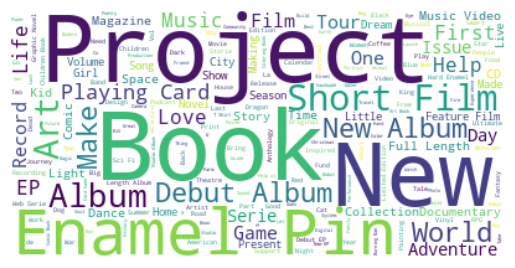

In [107]:
# top words in successful projects
text = " ".join(review for review in df[df.target == 1].name)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [112]:
# get all rows with colunm name containing 'Enamel Pin'

df[df.name.str.contains('Enamel Pin')].groupby('state').agg({'goal':'mean'})

,goal
state,
canceled,1336.586207
failed,988.020619
successful,872.816611
suspended,800.000000
